# COVID-19 Data Analysis

## Working Area

### Impoting Libraries
`Every library will have its own alias to simplify the code`

In [30]:
# Pandas will be named as pd, and NumPy will be named as np
import pandas as pd
import numpy as np

### Data Loading
`Data that had taken from BigQuery prior will be imported`

In [31]:
# Data Frame will be imported using Pandas and will be named as df
df = pd.read_csv('COVID19_Data_Analysis.csv')

### Data Cleaning & Data Exploration

In [32]:
# Obtaining the total number of empty cells for every column
df.isnull().sum()

province_state     1565
country_region        0
date                  0
latitude            795
longitude           795
location_geom       795
confirmed             0
deaths                0
recovered         21590
active            21622
fips               6346
admin2             6316
combined_key         23
dtype: int64

In [33]:
# Remove all unrelated columns
df = df.drop(columns = ['province_state','latitude','longitude','location_geom','fips','admin2','combined_key'])
# Rename column to make it more understandable
df.rename(columns = {'country_region' : 'country', 'confirmed' : 'total confirmed', 'deaths' : 'total death', 'recovered' : 'total recovered'}, inplace = True)

In [34]:
# Because confirmed, deaths, recovered, and active data are related to each other. Therefore, every row with over than 2 null cells will be removed
df = df[df.isnull().sum(axis=1) < 2]
df.isnull().sum()

country             0
date                0
total confirmed     0
total death         0
total recovered     0
active             32
dtype: int64

In [35]:
# Because the only column with null value is 'active' column, therefore only 1 column needs to be manipulated
# Since total confirmed = total deaths + total recovered + active, therefore the equation will be used for data manipulation
# Every 'people' data which has a value bellow 0 will be terminated
df.drop(df[df['total confirmed'] < 0 ].index, inplace = True)
df.drop(df[df['total death'] < 0 ].index, inplace = True)
df.drop(df[df['total recovered'] < 0 ].index, inplace = True)
df.drop(df[df['active'] < 0 ].index, inplace = True)
df['active'] = df['total confirmed'] - df['total death'] - df['total recovered']
df.drop(df[df['total confirmed'] != df['total death'] + df['total recovered'] + df['active']].index, inplace = True)
# Checking the total number of empty cells
print(df.isnull().sum())
# Obtaining the data type of each column
print(df.dtypes)

country            0
date               0
total confirmed    0
total death        0
total recovered    0
active             0
dtype: int64
country             object
date                object
total confirmed      int64
total death          int64
total recovered    float64
active             float64
dtype: object


In [36]:
# Convert the date into date time format
df['date'] = df['date'].astype('datetime64[ns]')
# Because the number of 'people' shall be in integer number, therefore every column with number of people data will be converted to integer number
df['total recovered'] = df['total recovered'].astype(int)
df['active'] = df['active'].astype(int)
# Checking the data type of each column
print(df.dtypes)

country                    object
date               datetime64[ns]
total confirmed             int64
total death                 int64
total recovered             int32
active                      int32
dtype: object


In [37]:
# Obtain the number of countries and number of rows
print('Total countries =',df.shape[0:1] - df['country'].duplicated().sum())
print('Total rows =' , np.array(df.shape)[0:1])
# Calculate the amount of data for every country
print(df.pivot_table(columns=['country'], aggfunc='size').sort_values(ascending = False))

Total countries = [196]
Total rows = [12761]
country
US                 9917
Russia              331
Japan               216
Colombia            148
China               133
                   ... 
Palau                 1
Hungary               1
Botswana              1
Solomon Islands       1
Bangladesh            1
Length: 196, dtype: int64


In [38]:
# Combine every data with same date in order to obtain the world's daily data
df_world = df.sort_values('date').groupby(['date']).sum().reset_index()
df_world['fatal rate (%)'] = (df_world['total death'] / df_world['total confirmed']) * 100
df_world['recover rate (%)'] = (df_world['total recovered'] / df_world['total confirmed']) * 100

In [39]:
# Brief check of world data
df_world

,date,total confirmed,total death,total recovered,active,fatal rate (%),recover rate (%)
0,2020-02-15,3528,12,1003,2513,0.340136,28.429705
1,2020-05-02,1132219,85853,339951,706415,7.582720,30.025198
2,2020-06-07,2712090,164712,906338,1641040,6.073250,33.418434
3,2020-06-20,2462743,110960,1075224,1276559,4.505545,43.659610
4,2020-07-09,4275593,219274,1537376,2518943,5.128505,35.957024
5,2020-07-22,3922390,130031,2048902,1743457,3.315096,52.236060
6,2020-09-20,9381538,279752,5096241,4005545,2.981942,54.322021
7,2020-10-09,13703931,374312,8169760,5159859,2.731421,59.616179
8,2020-12-20,21924277,489937,11471617,9962723,2.234678,52.323810
9,2021-01-04,30465464,655469,16776114,13033881,2.151515,55.066005


World daily case report


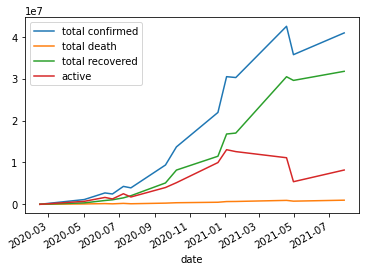

In [41]:
# Plotting World daily case report
df_world.plot(kind = 'line', x = 'date', y =['total confirmed','total death','total recovered', 'active'])
print('World daily case report')

World COVID 19 fatal rate compared to recover rate


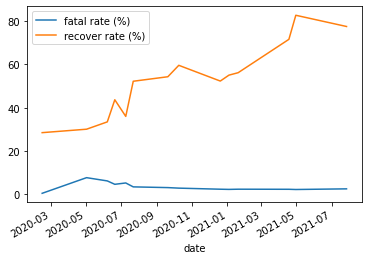

In [44]:
# Plotting World COVID 19 fatal rate compared to recover rate
df_world.plot(kind = 'line', x = 'date', y =['fatal rate (%)','recover rate (%)'])
print('World COVID 19 fatal rate compared to recover rate')

In [46]:
# Printing correlation between columns
df_world.corr().style.background_gradient(cmap='coolwarm')

,total confirmed,total death,total recovered,active,fatal rate (%),recover rate (%)
total confirmed,1.000000,0.992119,0.978592,0.844178,-0.508551,0.870023
total death,0.992119,1.000000,0.973745,0.828954,-0.448667,0.869141
total recovered,0.978592,0.973745,1.000000,0.715795,-0.481391,0.903658
active,0.844178,0.828954,0.715795,1.000000,-0.475598,0.598178
fatal rate (%),-0.508551,-0.448667,-0.481391,-0.475598,1.000000,-0.497658
recover rate (%),0.870023,0.869141,0.903658,0.598178,-0.497658,1.000000


In [67]:
# Creating dataframe that contains data from every region
df_country = df.sort_values('date').groupby(['country' , 'date']).sum().reset_index()
df_country['fatal rate (%)'] = (df_country['total death'] / df_country['total confirmed']) * 100
df_country['recover rate (%)'] = (df_country['total recovered'] / df_country['total confirmed']) * 100

1007    29.036895
Name: fatal rate (%), dtype: float64
1007   2020-12-20
Name: date, dtype: datetime64[ns]
1007    Yemen
Name: country, dtype: object


In [69]:
# Showing country with the highest fatal rate (%)
print(df_country[df_country['fatal rate (%)'] == df_country.max()[6]]['fatal rate (%)'])
print(df_country[df_country['fatal rate (%)'] == df_country.max()[6]]['date'])
print(df_country[df_country['fatal rate (%)'] == df_country.max()[6]]['country'])

1007    29.036895
Name: fatal rate (%), dtype: float64
1007   2020-12-20
Name: date, dtype: datetime64[ns]
1007    Yemen
Name: country, dtype: object


In [75]:
# Showing country with the highest recover rate (%)
print(df_country[df_country['recover rate (%)'] == df_country.max()[7]]['recover rate (%)'])
print(df_country[df_country['recover rate (%)'] == df_country.max()[7]]['country'])

39     100.0
153    100.0
259    100.0
277    100.0
316    100.0
317    100.0
328    100.0
370    100.0
371    100.0
372    100.0
402    100.0
403    100.0
508    100.0
586    100.0
587    100.0
607    100.0
770    100.0
774    100.0
780    100.0
781    100.0
784    100.0
785    100.0
811    100.0
846    100.0
908    100.0
909    100.0
985    100.0
986    100.0
Name: recover rate (%), dtype: float64
39                            Australia
153                            Cambodia
259                             Denmark
277                            Dominica
316                                Fiji
317                                Fiji
328                              France
370                             Grenada
371                             Grenada
372                             Grenada
402                            Holy See
403                            Holy See
508                                Laos
586                    Marshall Islands
587                    Marshall Islan

## Conclusions, Assumptions, Overall Analysis

### Assumptions
- `Every row that has more than 1 zero cell in column total confirmed, total death, total recovered, and active will be considered as unvalid data`
- `Every row that contains negative values will be considered as unvalid data`
- `Every row that does not satisfy the balance equation "total confirmed = total death + total recovered + active" will be considered as unvalid data`
- `Every unvalid data will be terminated`
- `Due to lack of skills, every forecasting data method eg: interpolation, extrapolation, regression, ext. will not perform`

### Conclusions
- `US dominating the whole data`
- `the number of recovered people never less than the number of death people due to COVID 19`
- `fatal rate always moving in the opposite direction for every data`
- `country with the highest fatal rate is Yemen, with 29.036895% at 2020-12-20`
- `country with the highest recover rate is:`
<br> Australia
<br> Cambodia
<br> Denmark
<br> Dominica
<br> Fiji
<br> France
<br> Grenada
<br> Holy See
<br> Laos
<br> Marshall Islands
<br> Micronesia
<br> Saint Kitts and Nevis
<br> Saint Vincent and the Grenadines
<br> Samoa
<br> Seychelles
<br> Spain
<br> Timor-Leste
<br> Vanuatu
<br> `with 100% of recover rate`
